# Modelo Matemático Contínuo
GHALY, A. E.; EL-TAWEEL, A. A. Kinetic modelling of continuous production of ethanol from cheese whey. Biomass and Bioenergy, vol. 12, no. 6, p. 461–472, 1997. https://doi.org/10.1016/S0961-9534(97)00012-3.

Modelo Matemático Contínuo considerando variações nas variáveis exógenas do problema

In [1]:
import numpy as np 
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.preprocessing import MinMaxScaler
plt.rc("font", size=14)
plt.rc("figure", figsize=(10,7))

In [2]:
#Mudança manual nas variáveis exógenas
dados = pd.read_csv("dados_felipe.csv", sep=',', decimal=',', index_col=None)
v_exog = dados.iloc[:,1:4].values
# dados.set_index("t (h)")

In [29]:
dados.head(2)

,t (h),Qi (L/h),Si (g/L),Xi (g/L)
0,0,0.0969,100,0.025
1,200,0.0798,100,0.025


In [3]:
dados.describe()

,t (h),Qi (L/h),Si (g/L),Xi (g/L)
count,30.000000,30.000000,30.000000,30.000000
mean,2900.000000,0.084820,102.000000,0.051500
std,1760.681686,0.016750,33.774097,0.014333
min,0.000000,0.057000,50.000000,0.025000
25%,1450.000000,0.069825,82.500000,0.046250
50%,2900.000000,0.079800,105.000000,0.055000
75%,4350.000000,0.102600,137.500000,0.060000
max,5800.000000,0.108600,150.000000,0.075000


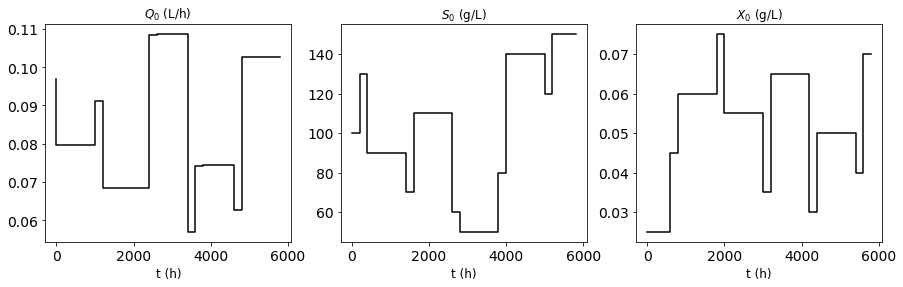

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4), sharex=True)

ax1.step(dados.iloc[:,0],v_exog[:,0], c='k', drawstyle='mid')
ax1.set_title("$Q_0$ (L/h)", size=12)
ax1.set_xlabel("t (h)", size=12)

ax2.step(dados.iloc[:,0],v_exog[:,1], c='k', drawstyle='mid')
ax2.set_xlabel("t (h)", size=12)
ax2.set_title("$S_0$ (g/L)", size=12)

ax3.step(dados.iloc[:,0],v_exog[:,2], c='k', drawstyle='mid')
ax3.set_xlabel("t (h)", size=12)
ax3.set_title("$X_0$ (g/L)", size=12)

plt.savefig("Imagens/graficos_perturbacoes.jpg", format='jpg', bbox_inches="tight", dpi=300)

In [22]:
# Variaveis auxiliares
Mu = 0.051 # h^-1
Kd = 0.005 # h^-1
Ks = 1.9 # g/L
Kp = 20.650 # g/L
Ksl = 112.51 # g/L
Cv = 1.0110388566223264e-06 # dm^2
g = 9.81*10*3600**2 # dm/h^2
At = 1 # dm^2
ms = 5.13
YXS = 0.072
YPS = 0.369
Qi = 0.05
Xi = 0.025
Si = 100
def F(y,t):
    V=y[0]
    X=y[1]
    S=y[2]
    P=y[3]
    Qo = Cv*pow(2*g*V/At, 0.5)
    
    mu = Mu*S/(Ks+S)*Kp/(Kp+P)*Ksl/( Ksl+S)
    alpha = YPS/YXS
    beta = YPS*ms
    rx = mu*X
    rd = Kd*X
    rp = alpha*rx+beta*X
    
    # Derivadas
    dVdt = Qi -Qo
    dXdt = Qi/V*(Xi -X)+rx -rd
    dPdt = -Qi/V*P + rp
    Rxs = rx / YXS
    Rps = rp / YPS
    Rms = ms*X
    dSdt = Qi/V*(Si -S) -(Rxs+Rms+Rps)
    dydt = [dVdt , dXdt , dSdt , dPdt]
    return dydt
y0 = [3.7 , 0.10819826943270977 , 1.682128586540394 , 0.1]
# y0 = [4.537528930501552 , 0.10819826943270977 , 1.682128586540394 , 8.409823198816403]

V, X, S, P, t = [], [], [], [], []
tspan = 201

for i in range(len(v_exog)):
    Qi = v_exog[i, 0]
    Si = v_exog[i, 1]
    Xi = v_exog[i, 2]
    time = np.linspace(i*200 , i*200+200 , tspan)
    sol = odeint(F, y0, time)
    v, x, s, p = sol[:,0], sol[:,1], sol[:,2], sol [: ,3]
    y0 = [v[-1], x[-1], s[-1], p[ -1]]
    V.append(v), X.append(x), S.append(s), P.append(p), t.append(time)

In [23]:
teste_t = np.array(t)[:, 0:-1].flatten()
teste_V = np.array(V)[:, 0:-1].flatten()
teste_X = np.array(X)[:, 0:-1].flatten()
teste_S = np.array(S)[:, 0:-1].flatten()
teste_P = np.array(P)[:, 0:-1].flatten()

dados_simulacao = {"t (h)":teste_t, 'V (L)':teste_V, 'X (g/L)':teste_X, "S (g/L)":teste_S, 'P (g/L)':teste_P}
dados_simulacao = pd.DataFrame(dados_simulacao)
dados_simulacao = dados_simulacao.set_index("t (h)")
dados_simulacao.head()

,V (L),X (g/L),S (g/L),P (g/L)
t (h),,,,
0.0,3.700000,0.108198,1.682129,0.100000
1.0,3.698841,0.108425,3.046809,0.314600
2.0,3.697698,0.109157,4.357533,0.527236
3.0,3.696569,0.110149,5.618361,0.737460
4.0,3.695456,0.111285,6.831581,0.945140


In [24]:
dados_simulacao.describe()

,V (L),X (g/L),S (g/L),P (g/L)
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.853007,0.114788,60.910135,7.441143
std,1.022780,0.030282,39.076912,2.255723
min,1.307874,0.052337,-1.272913,0.100000
25%,1.977050,0.095947,27.980190,5.579743
50%,2.450170,0.112293,68.532007,7.736011
75%,4.032088,0.138907,96.716369,8.977667
max,4.537518,0.191806,122.542200,13.767639


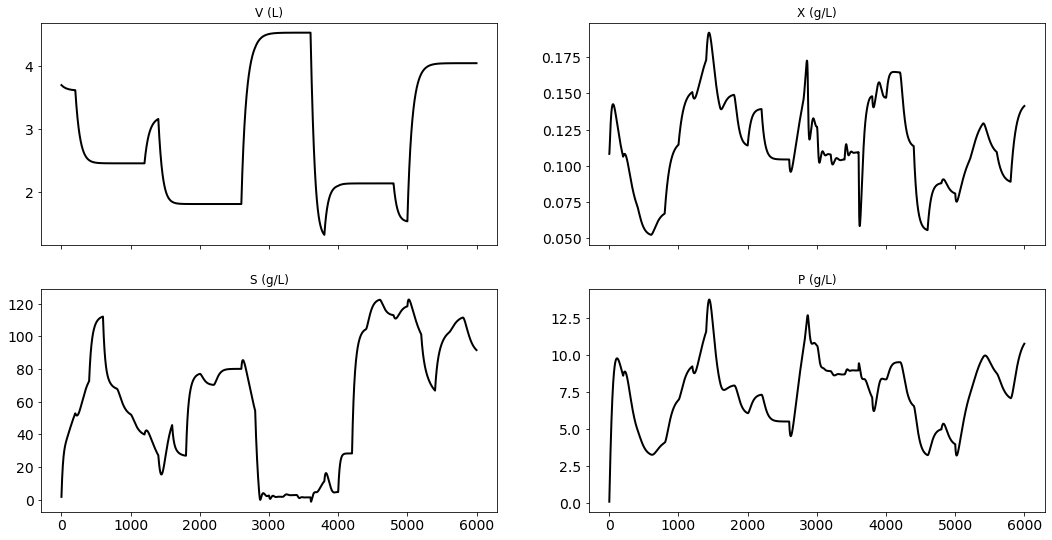

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,9), sharex=True)

ax1.plot(teste_t, teste_V, c='k', lw=2)
ax1.set_title("V (L)", size=12)
ax2.plot(teste_t, teste_X, c='k', lw=2)
ax2.set_title("X (g/L)", size=12)
ax3.plot(teste_t, teste_S, c='k', lw=2)
ax3.set_title("S (g/L)", size=12)
ax4.plot(teste_t, teste_P, c='k', lw=2)
ax4.set_title("P (g/L)", size=12)

plt.savefig("Imagens/4graficos.jpg", format="jpg", dpi=350, bbox_inches="tight")

## Normalização dos dados

In [30]:
scaler = MinMaxScaler()
scaler.fit(dados_simulacao)
dados_normalizados = scaler.transform(dados_simulacao)

## Adição de Ruído Gaussiano

In [31]:
np.random.normal(size=(2,4))*np.random.choice([0,1], size=(2,4), p=[0.9, 0.1])

array([[-0.       , -0.       , -0.       , -0.       ],
       [ 1.5541684, -0.       ,  0.       ,  0.       ]])

In [35]:
dados_simulacao_ruido = dados_normalizados + np.random.normal(loc=0., scale=0.009, size=dados_normalizados.shape)*np.random.choice([0, 1],
                                                            size=dados_normalizados.shape, p=[0.85, 0.15])
dados_simulacao_ruido = scaler.inverse_transform(dados_simulacao_ruido)
dados_final = pd.DataFrame(np.where(dados_simulacao_ruido<0, 0, dados_simulacao_ruido))
dados_final.columns = list(dados_simulacao.columns)

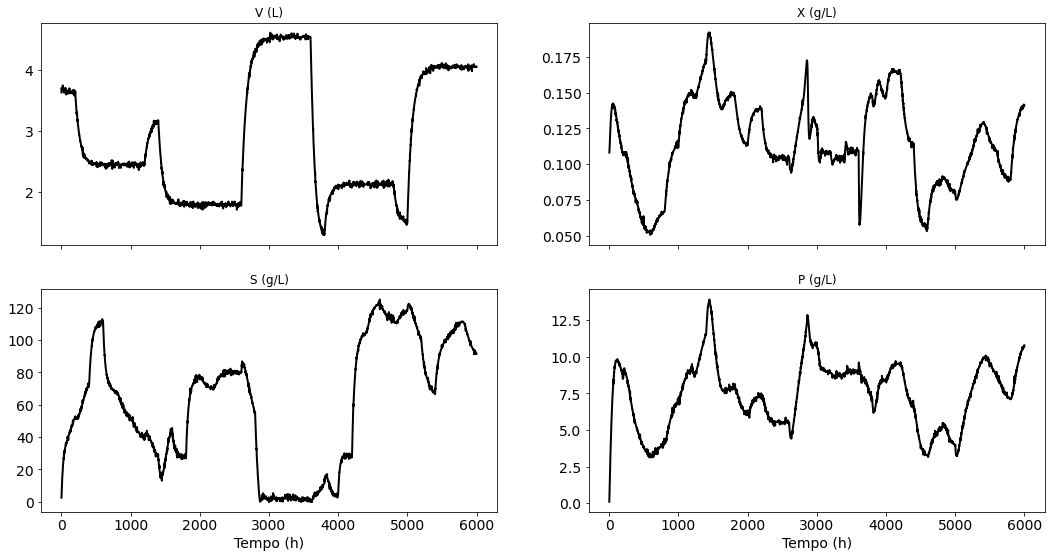

In [41]:
V_ruido = dados_final.iloc[:,0]
X_ruido = dados_final.iloc[:,1]
S_ruido = dados_final.iloc[:,2]
P_ruido = dados_final.iloc[:,3]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,9), sharex=True)

ax1.plot(teste_t, V_ruido, c='k', lw=2)
ax1.set_title("V (L)", size=12)
ax2.plot(teste_t, X_ruido, c='k', lw=2)
ax2.set_title("X (g/L)", size=12)
ax3.plot(teste_t, S_ruido, c='k', lw=2)
ax3.set_title("S (g/L)", size=12)
ax3.set_xlabel("Tempo (h)")
ax4.plot(teste_t, P_ruido, c='k', lw=2)
ax4.set_title("P (g/L)", size=12)
ax4.set_xlabel("Tempo (h)")

plt.savefig("Imagens/4graficos_comruido.jpg", format='jpg', bbox_inches="tight", dpi=370)

In [34]:
#Exportando os dados obtidos
np.savetxt("Dados/dados_com_ruido.csv", dados_final, delimiter=',')
np.savetxt("Dados/instante.csv", teste_t, delimiter=',')

# Criando dados estáveis para teste posterior

In [41]:
sol[-1]

array([ 4.04999329,  0.14126787, 91.54037328, 10.78579976])

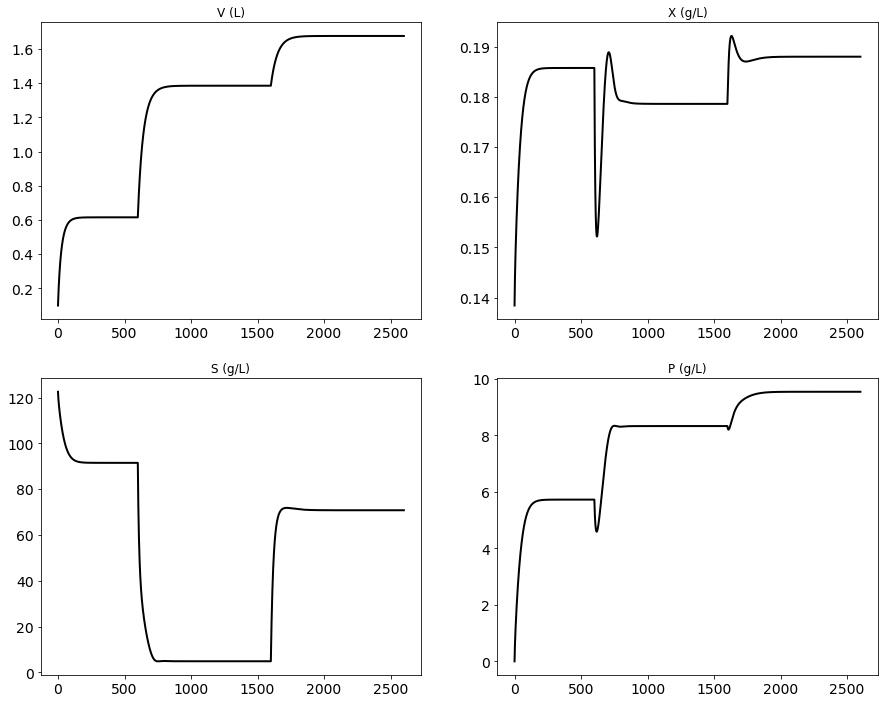

In [45]:
tempo = np.linspace(0, 600, 2000)
tempo2=np.linspace(600,1600,2000)
tempo3=np.linspace(1600,2600,2000)

Qi=0.04
Xi=0.138411
Si=122.542200
sol = odeint(F, y0=[0.1, Xi, Si, 0],t=tempo)
Qi=0.06
Xi=0.096142
Si=50
sol2=odeint(F,y0=sol[-1],t=tempo2)
Qi=0.066
Xi=0.112375
Si=122.542200
sol3=odeint(F,y0=sol2[-1],t=tempo3)

sol = np.concatenate([sol,sol2,sol3])
tempo=np.concatenate([tempo,tempo2,tempo3])

np.savetxt("Dados/planta_teste_X.csv", sol, delimiter=',')
np.savetxt("Dados/planta_teste_T.csv", tempo, delimiter=',')


Vt = sol[:, 0]
Xt = sol[:, 1]
St = sol[:, 2]
Pt = sol[:, 3]

# plt.plot(tempo, Vt)
# plt.plot(tempo, St)
# plt.plot(tempo, Xt)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,12))

ax1.plot(tempo, Vt, c='k', lw=2 )
ax1.set_title("V (L)", size=12  )
ax2.plot(tempo, Xt, c='k', lw=2 )
ax2.set_title("X (g/L)", size=12)
ax3.plot(tempo, St, c='k', lw=2 )
ax3.set_title("S (g/L)", size=12)
ax4.plot(tempo, Pt, c='k', lw=2 )
ax4.set_title("P (g/L)", size=12)
plt.savefig("Imagens/planta_teste.pdf", format='pdf')

In [43]:
dados_simulacao.describe().T

,count,mean,std,min,25%,50%,75%,max
V (L),6000.0,2.853007,1.022780,1.307874,1.977050,2.450170,4.032088,4.537518
X (g/L),6000.0,0.114788,0.030282,0.052337,0.095947,0.112293,0.138907,0.191806
S (g/L),6000.0,60.910135,39.076912,-1.272913,27.980190,68.532007,96.716369,122.542200
P (g/L),6000.0,7.441143,2.255723,0.100000,5.579743,7.736011,8.977667,13.767639
